# First approach on ideal modelling



1. Implementing all necessary packages

In [1]:
import numpy as np
from diffusionpy import Diffusion_MS,D_Matrix,vpure,Gammaij
import matplotlib.pyplot as plt
from numpy import array
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import xlwings as xw
import pandas as pd

C:\GitHub_Projects\diffusionpy\diffusionpy\PCSAFT.py:256: RuntimeWarning: invalid value encountered in divide
  lngi_wx=np.nan_to_num(np.log(np.divide(xi,wi)),0)
C:\GitHub_Projects\diffusionpy\diffusionpy\PCSAFT.py:256: RuntimeWarning: invalid value encountered in log
  lngi_wx=np.nan_to_num(np.log(np.divide(xi,wi)),0)
C:\GitHub_Projects\diffusionpy\diffusionpy\diffusion.py:240: RuntimeWarning: divide by zero encountered in divide
  dlnai_dlnwi=dlnai_dlnwi/wi[...,None,:]*wi[...,:,None]/ri[...,:,None]
C:\GitHub_Projects\diffusionpy\diffusionpy\diffusion.py:240: RuntimeWarning: invalid value encountered in divide
  dlnai_dlnwi=dlnai_dlnwi/wi[...,None,:]*wi[...,:,None]/ri[...,:,None]
C:\GitHub_Projects\diffusionpy\diffusionpy\diffusion.py:240: RuntimeWarning: invalid value encountered in multiply
  dlnai_dlnwi=dlnai_dlnwi/wi[...,None,:]*wi[...,:,None]/ri[...,:,None]


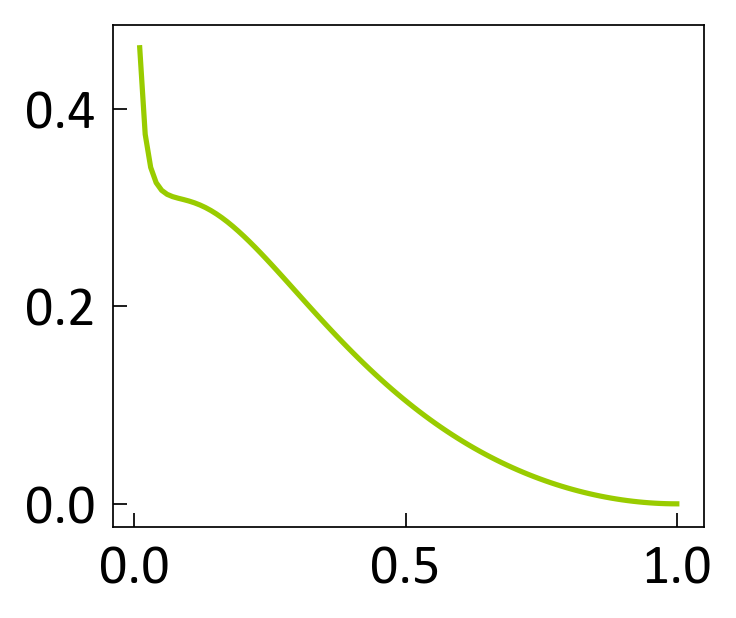

In [2]:
T=298.15
p=1E5
nc=3 # number of components
L=1E-4 # estimated thickness of the ASD
wi0=np.asarray([0.49999,0.49999,0.00002]) # Weight fractions of the components API, polymer, water at t=0
wi8=np.asarray([0.00001,0.00001,0.99998]) # Weight fractions of the components API, polymer, water at t=8.T
Mi= np.asarray([357.79,65000,18.15])

kij=D_Matrix(np.asarray([-0.0621,-0.025,-0.156]),nc)
par={"mi":np.asarray([14.283,2420.99,1.2046 ]),
"si": np.asarray([3.535,2.947, 2.797059952]),
"ui" :np.asarray([262.79,205.27,353.95 ]),
"eAi" :np.asarray([886.4,0.,2425.67 ]),
"kAi":np.asarray([ 0.02,0.02,0.04509 ]),
"NAi":np.asarray([3.,653., 1.]),
"Mi": Mi,
"kij":kij,
"kijA":np.asarray([[0.]])}
vpures=vpure(p,T,**par)
par["vpure"]=vpures
dlnai_dlnwi_fun=lambda wi: Gammaij(T,wi,par)

DL=0.
ww=np.linspace(0,1,100)
wspace=np.asarray([DL*(1-ww),(1-DL)*(1-ww),ww])

Gammaw=np.asarray([dlnai_dlnwi_fun(val)[-1,-1] for val in wspace.T])
plt.plot(ww,Gammaw)
plt.show()


Fitting the sorption Data und Calculation of the Sorption MS Coefficients

[1.e-10]
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.0397413 seconds ----------------
------------- Initialization and postprocessing took 0.0014 seconds----------------
[1.00000001e-10]
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------


C:\GitHub_Projects\diffusionpy\diffusionpy\diffusion.py:164: RuntimeWarning: invalid value encountered in divide
  Lt=np.sum(wi0[immobiles])/(1-np.sum(wt[mobiles,:],axis=0))*L


------------- Diffusion modeling took 0.0397052 seconds ----------------
------------- Initialization and postprocessing took 0.0029414 seconds----------------
[3.177683e-11]
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.0423572 seconds ----------------
------------- Initialization and postprocessing took 0.0035045 seconds----------------
[3.17768305e-11]
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.0269244 seconds ----------------
------------- Initialization and postprocessing took 0.0017631 seconds----------------
[1.58346055e-11]
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.0346494 seconds ----------------
------------- Initialization and po

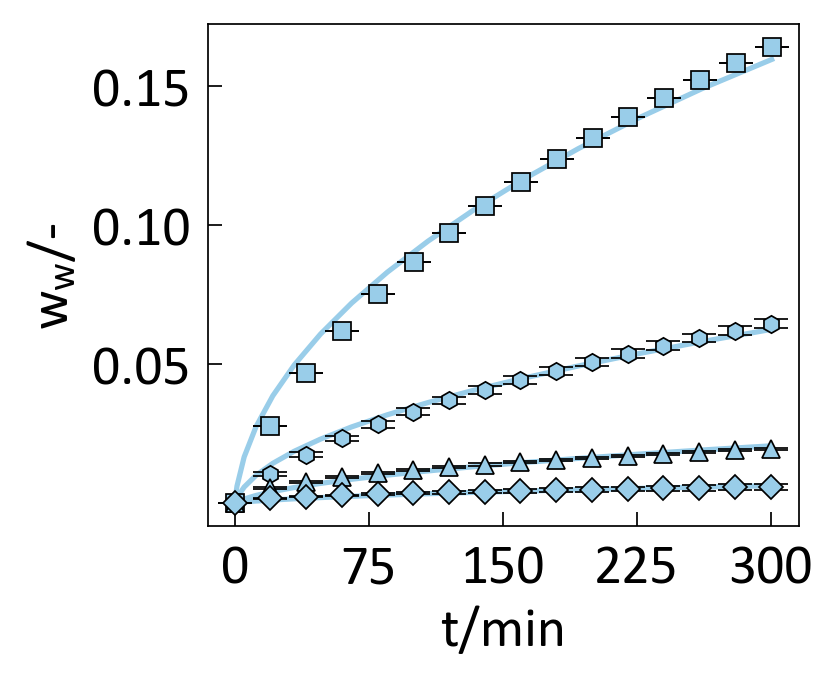

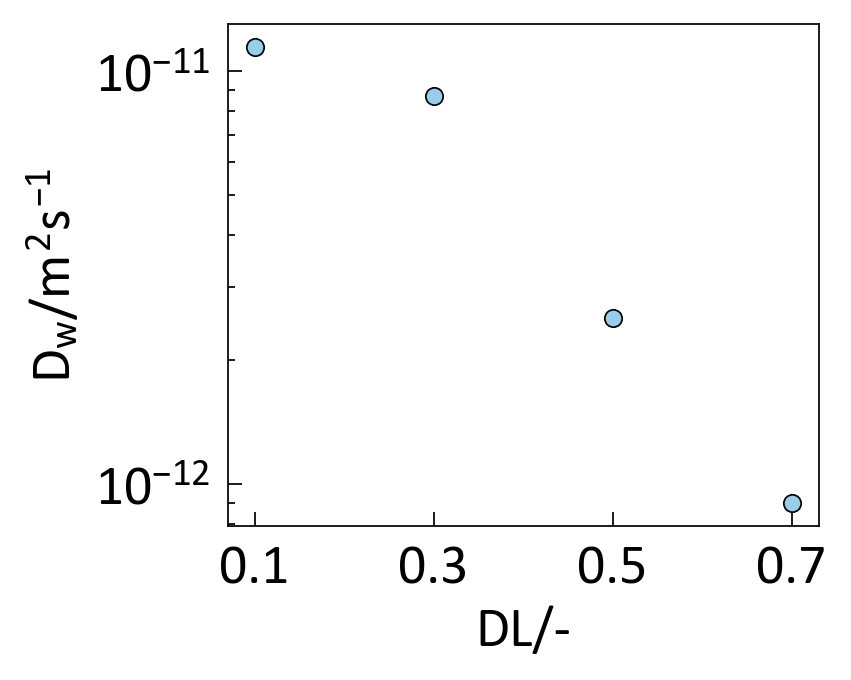

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from diffusionpy import Diffusion_MS
from scipy.optimize import curve_fit

# tsorpL1D03= np.array([0,1001,2002,3003,4004,5005,6005,7007,8008,9008,10009,11010,12010,13012,14012,15013,16015,17015,18016])
# wwsorpL1D03 = np.array([1.4E-5,8.35E-3,1.443E-2,1.947E-2,2.39E-2,2.79E-2,3.158E-2,3.5E-2,3.821E-2,4.125E-2,4.413E-2,4.689E-2,4.952E-2,5.204E-2,5.447E-2,5.681E-2,5.906E-2,6.124E-2,6.336E-2])
# tsorpL1D05= np.array([0,1005,2006,3007,4009,5010,6011,7013,8014,9016,10017,11018,12019,13021,14022,15023,16024,17026,18027])
# wwsorpL1D05= np.array([3.1E-6,5.1E-3,7.4E-3,9E-3,1.029E-2,1.114E-2,1.238E-2,1.327E-2,1.408E-2,1.484E-2,1.554E-2,1.62E-2,1.682E-2,1.742E-2,1.798E-2,1.852E-2,1.904E-2,1.954E-2,2.002E-2])
# tsorpL1D07= np.array([0,1200,2400,3600,4800,6000,7200,8400,9600,10800,12000,13200,14400,15600,16800,18000])
# wwsorpL1D07= np.array([0,1.82E-3,2.59E-3,3.08E-3,3.46E-3,3.77E-3,4.04E-3,4.29E-3,4.51E-3,4.71E-3,4.91E-3,5.09E-3,5.26E-3,5.42E-3,5.58E-3,5.73E-3])

# tsorpL25D03= np.array([0,1001,2003,3004,4006,5007,6008,7010,8011,9012,10013,11015,12016,13018,14019,15020,16022,17023,18025])
# wwsorpL25D03= np.array([6.6E-6,4.128E-2,6.4E-2,8.099E-2,9.493E-2,0.10691,0.11746,0.12691,0.13548,0.14328,0.15036,0.15677,0.1625,0.1676,0.1721,0.17607,0.17955,0.18263,0.18535])
# tsorpL25D03=np.array([0,990.6,1981.8,2972.4,3963,4954.2,5944.8,6936,7926.6,8917.8,9908.4,10899.6,11890.2,12881.4,13872,14863.2,15853.8,16844.4,17835.6])
# wwsorpL25D03=np.array([0,0.032197737,0.051746253,0.066878234,0.079514529,0.090600233,0.100391134,0.109238105,0.117336032,0.124844276,0.131764824,0.138088973,0.143849781,0.149063284,0.153688067,0.15779709,0.161400097,0.164581484,0.167453184])
# tsorpL25D05= np.array([0,1001,2003,3004,4006,5007,6008,7010,8011,9012,10013,11015,12016,13018,14019,15020,16022,17023,18025])
# wwsorpL25D05= np.array([1.1E-4,2.438E-2,3.352E-2,3.902E-2,4.284E-2,4.581E-2,4.825E-2,5.048E-2,5.25E-2,5.435E-2,5.606E-2,5.773E-2,5.913E-2,6.056E-2,6.194E-2,6.314E-2,6.429E-2,6.556E-2,6.656E-2])
# tsorpL25D07= np.array([0,1200,2400,3600,4800,6000,7200,8400,9600,10800,12000,13200,14400,15600,16800,18000])
# wwsorpL25D07= np.array([0,8.1E-3,1.106E-2,1.32E-2,1.494E-2,1.642E-2,1.771E-2,1.887E-2,1.994E-2,2.0904E-2,2.1806E-2,2.2643E-2,2.343E-2,2.417E-2,2.487E-2,2.554E-2])

tsorpL1D03= np.array([0,1200,2400,3600,4800,6000,7200,8400,9600,10800,12000,13200,14400,15600,16800,18000])
wwsorpL1D03 = np.array([0.,0.010374599,0.0174311,0.023229907,0.028267926,0.032782074,0.036900323,0.04070603,0.044264568,0.047607044,0.05076547,0.053774031,0.056656536,0.059397788,0.062044018,0.064571237])
wwsorpL1D03std = np.array([0,0.000641085,0.000861621,0.001021338,0.001151687,0.001254286,0.001335276,0.001399524,0.001442952,0.001481377,0.001514494,0.001541324,0.001554668,0.001576872,0.001586359,0.001605019])
tsorpL1D05= np.array([0,1200,2400,3600,4800,6000,7200,8400,9600,10800,12000,13200,14400,15600,16800,18000])
wwsorpL1D05= np.array([0.,0.005380217,0.007659035,0.009323966,0.010689421,0.0118631,0.012905932,0.013843724,0.014731502,0.015519263,0.016274512,0.016995103,0.017664479,0.018296743,0.018904948,0.019473884])
wwsorpL1D05std= np.array([0,0.000223794,0.000312617,0.000342914,0.000355741,0.000369374,0.00037563,0.000385026,0.000369605,0.00038216,0.000382352,0.000373158,0.000373879,0.000376417,0.000374297,0.000380467])
tsorpL1D07= np.array([0,1200,2400,3600,4800,6000,7200,8400,9600,10800,12000,13200,14400,15600,16800,18000])
wwsorpL1D07std= np.array([0,8.1857E-05,0.000160693,0.000240792,0.00032721,0.000408482,0.000488091,0.000562201,0.000634513,0.000708476,0.000774512,0.000842291,0.000914209,0.00098031,0.001044898,0.001100812])
wwsorpL1D07= np.array([0., 0.0016406155, 0.0022857975, 0.002754174, 0.0031448005, 0.0034792755, 0.003783919, 0.004064719, 0.00432401, 0.004568158, 0.0047980955, 0.005016264, 0.0052281775, 0.005428655, 0.005620538, 0.00580549])


tsorpL25D03= np.array([0,1200,2400,3600,4800,6000,7200,8400,9600,10800,12000,13200,14400,15600,16800,18000])
wwsorpL25D03= np.array([0.,0.044444444,0.068181818,0.086363636,0.101010101,0.113636364,0.125252525,0.136363636,0.144444444,0.152525253,0.159090909,0.165151515,0.170707071,0.175252525,0.17979798,0.183333333])
wwsorpL25D03std=np.array([0.,0.005050505,0.006565657,0.006818182,0.006818182,0.007323232,0.006818182,0.007575758,0.007575758,0.007575758,0.007070707,0.006818182,0.006818182,0.006818182,0.006818182,0.007070707])
tsorpL25D05= np.array([0,1200,2400,3600,4800,6000,7200,8400,9600,10800,12000,13200,14400,15600,16800,18000])
wwsorpL25D05=np.array([0,2.32E-02,3.18E-02,3.84E-02,4.24E-02,4.60E-02,4.95E-02,5.15E-02,5.40E-02,5.66E-02,5.86E-02,6.06E-02,6.26E-02,6.41E-02,6.57E-02,6.72E-02])
wwsorpL25D05std= np.array([0,2.53E-03,3.03E-03,2.78E-03,2.27E-03,1.77E-03,1.77E-03,2.27E-03,2.02E-03,3.03E-03,2.78E-03,3.03E-03,2.78E-03,2.78E-03,3.28E-03,2.53E-03])
tsorpL25D07= np.array([0,1200,2400,3600,4800,6000,7200,8400,9600,10800,12000,13200,14400,15600,16800,18000])
wwsorpL25D07= np.array([0,8.1E-3,1.106E-2,1.32E-2,1.494E-2,1.642E-2,1.771E-2,1.887E-2,1.994E-2,2.0904E-2,2.1806E-2,2.2643E-2,2.343E-2,2.417E-2,2.487E-2,2.554E-2])
wwsorpL25D07std=np.array([0.,1.26E-03,2.27E-03,2.78E-03,3.54E-03,4.04E-03,4.80E-03,5.30E-03,5.81E-03,5.56E-03,5.81E-03,6.82E-03,6.82E-03,7.07E-03,7.58E-03,7.58E-03])
tsorpL1D0=np.array([0,1000.8,2011.2,3021.6,4032.6,5043,6053.4,7063.8,8074.8,9085.2,10096.2,11106.6,12117,13127.4,14138.4,15148.8,16159.2,17170.2,18180.6,19191,20202,21212.4,22222.8,23233.2,24244.2,25254.6,26265,27276,28286.4,29297.4,30307.8,31318.2,32328.6,33339.6,34350])
wwsorpL1D0=np.array([2.32264E-05,0.032490472,0.056981835,0.077413963,0.095178449,0.110986758,0.125309571,0.138440911,0.150612773,0.1619091,0.172361956,0.182051,0.191073767,0.199457794,0.207237963,0.214556109,0.221489884,0.228057404,0.234293133,0.240213112,0.245848113,0.25120615,0.256302361,0.261154739,0.265761433,0.270113111,0.274226366,0.27809627,0.281728653,0.285163287,0.288411191,0.291466507,0.294353471,0.297088495,0.299696478])
tsorpL1D10=np.array([0,20.044,40.088,60.132,80.176,100.22,120.264,140.308,160.352,180.396,200.44,220.484,240.528,260.572,280.616,300.66])*60
wwsorpL1D10=np.array([0.0001,0.027820849,0.046658373,0.061991767,0.075180605,0.086818259,0.097275619,0.106840013,0.115671689,0.123898119,0.131592556,0.138825749,0.145664009,0.15215107,0.158338286,0.164251887])


wi_0= np.array([0.9999,0.0001])
mobile =np.array([True, True])
Mi0= np.asarray([357.79,65000,16.02])



def Choose_Sorp(L_ASD,DL_ASD):
    if L_ASD == 1 and DL_ASD == 0.3:
        t_sorp= tsorpL1D03
        ww_sorp= wwsorpL1D03
        ww_sorpstd= wwsorpL1D03std
        wi_8 = np.array([0.8521,0.1479])
    elif L_ASD==1 and DL_ASD ==0.5: 
        t_sorp= tsorpL1D05
        ww_sorp= wwsorpL1D05
        ww_sorpstd= wwsorpL1D05std
        wi_8 = np.array([0.9054,0.0946])
    elif L_ASD==1 and DL_ASD ==0.7: 
        t_sorp= tsorpL1D07
        ww_sorp= wwsorpL1D07
        ww_sorpstd= wwsorpL1D07std
        
        wi_8 = np.array([0.9405,0.0505])
    elif L_ASD == 0.25 and DL_ASD == 0.3:
        t_sorp= tsorpL25D03
        ww_sorp= wwsorpL25D03
        ww_sorpstd= wwsorpL25D03std
        wi_8 = np.array([0.8521,0.1479])
    elif L_ASD==0.25 and DL_ASD ==0.5: 
        t_sorp= tsorpL25D05
        ww_sorp= wwsorpL25D05
        ww_sorpstd= wwsorpL25D05std
        wi_8 = np.array([0.9054,0.0946])
    elif L_ASD==0.25 and DL_ASD ==0.7: 
        t_sorp= tsorpL25D07
        ww_sorp= wwsorpL25D07
        ww_sorpstd= wwsorpL25D07std
        wi_8 = np.array([0.9405,0.0505])
    elif L_ASD==1 and DL_ASD ==0:
        t_sorp= tsorpL1D0
        ww_sorp= wwsorpL1D0
        ww_sorpstd= np.zeros_like(wwsorpL1D0)
        L_ASD=43.0544/1E3/(np.pi/4*0.008**2)/1190
        wi_8 = np.array([0.65,0.35])
    elif L_ASD==1 and DL_ASD ==0.1:
        t_sorp= tsorpL1D10
        ww_sorp= wwsorpL1D10
        ww_sorpstd= np.zeros_like(wwsorpL1D10)
        L_ASD=47.5249/1E3/(np.pi/4*0.008**2)/1190
        wi_8 = np.array([0.74,0.26])
        # wi_8 = np.array([0.5,0.15])
    else: print('Bitte gültige Länge und Drugload eingeben!')
    nt=len(t_sorp)
    t=np.linspace(0,t_sorp[-1]**0.5,nt)**2
    L= L_ASD*10E-4
    w_APIPol= 1-ww_sorp
    M_APIPol= 1/((DL_ASD/Mi0[0])+((1-DL_ASD)/Mi0[1])) #Mittlere molare Masse
    Mi = np.array([M_APIPol,16.02])
    from numpy import array

    def fit_Diff_Sorp (ww_sorp,w_APIPol):
        def Diff_for_fit(t,D_sorp):
            Dscale=1E13 #Hilfsvariable
            Dsorp_norm=np.array([D_sorp])/Dscale #Normieren des Diffusionskoeffs (DKs)
            print(Dsorp_norm) #Ausgeben des normierten DKs
            ww=Diffusion_MS(t,L,Dsorp_norm,wi_0,wi_8,mobile)[0] #Ouput ist 2D
            return ww[:,1] #Rückgabe von w_H2O in ww
        Dscale=1E13
        qopt_H2O, qcov_H2O= curve_fit(Diff_for_fit,t_sorp,ww_sorp,bounds=(1E-6,1E10),p0=(1000)) #Einsetzen von normierten DKs in Solver
        Dsorpopt=qopt_H2O/Dscale #Zurückskalieren der optimierten DKs in Array
        print(Dsorpopt)
        
        return Dsorpopt
    Dsorpopt= fit_Diff_Sorp(ww_sorp,w_APIPol)
    ww,wtz,zvec,Lt= Diffusion_MS(t,L,Dsorpopt,wi_0,wi_8,mobile,full_output=True)
    wwz=wtz[:,1,:]
    # fig,ax =origin_like.subplots()
    # origin_like.plot(ax,zvec*1E3*np.average(1/(1-wwz[-1,:])),wwz[-1,:],'b-')
    # ax.set_yticks([0,0.25,0.5,0.75,1.])
    # ax.set_xticks([0,0.25,0.5,0.75,1.])
    return ww, Dsorpopt, t_sorp, ww_sorp,ww_sorpstd
    

def plot_sorp (ax,t_sorp, ww_sorp):
    fig,ax=plt.subplots()
    ax.plot(t_sorp,ww_sorp,'bo')

fig,ax=plt.subplots()
fig1,ax1=plt.subplots()
ax.set_xticks([0,75,150,225,300])
ax.set_yticks([0.05,0.1,0.15,0.25,0.3])
ax1.set_yticks([5E-13,1E-12,1E-11,5E-11])
ax1.set_yscale('log')
ax1.set_xticks([0.1,0.3,0.5,0.7])
ds=[]
def plot_fit_sorp (L,DL):
    list =[]
    ww, Dsorpopt, t_sorp, ww_sorp,ww_sorpstd= Choose_Sorp(L,DL)
    nt=len(t_sorp)
    t=np.linspace(0,t_sorp[-1]**0.5,nt)**2
    if DL==0.:
        sym="o"
    elif DL==0.1:
        sym="s"
    elif DL==0.3:
        sym="h"
    elif DL==0.5:
        sym='^'
    elif DL==0.7:
        sym='D'
    ax.plot(t/60, ww [:,1],'C1-')
    ax.errorbar(t_sorp/60,ww_sorp,fmt='C1'+sym,yerr=ww_sorpstd,ecolor='k',elinewidth=0.5)
    
    ax.set_xlabel("t/min")
    ax.set_ylabel("$w_w$/-")
    ax1.plot(DL,Dsorpopt,'C1o')
    ax1.set_xlabel("DL/-")
    ax1.set_ylabel("$D_w/m^2 s^{-1}$")
    ds.append(Dsorpopt)
    #xL = np.linspace(0.3,0.7,3)
    #for D in xL:
    #    a,b,c,d = Choose_Sorp(L,D)
    #    list.append(b)
    #Dvec_sorp= np.array(list)
    #fig,axis = plt.subplots()
    #axis.plot(xL,Dvec_sorp,'b*')

    
# plot_fit_sorp(1,0.)
# plot_fit_sorp(0.25,0.3)
# plot_fit_sorp(0.25,0.5)
# plot_fit_sorp(0.25,0.7)
#import pandas as pd
# plot_fit_sorp(1,0)
plot_fit_sorp(1,0.1)
plot_fit_sorp(1,0.3)
plot_fit_sorp(1,0.5)
plot_fit_sorp(1,0.7)
print(np.asarray(ds).tolist())
plt.show()
# Export_to_Excel(0.25,0.7)